## Telecom Churn Case Study
With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.

### Importing and Merging Data

In [247]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np

In [248]:
# Importing all datasets
churn_data = pd.read_csv("churn_data.csv")
customer_data = pd.read_csv("customer_data.csv")
internet_data = pd.read_csv("internet_data.csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [249]:
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [250]:
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [251]:
#Merging on 'customerID'
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [252]:
#Final dataframe with all predictor variables
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')

### Let's understand the structure of our dataframe

In [253]:
# Let's see the head of our master dataset
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [254]:
telecom['PaymentMethod'].unique()
print(telecom.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [255]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [256]:
# Let's see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


### Data Preparation

In [257]:
# Converting Yes to 1 and No to 0

telecom['PhoneService'] = telecom['PhoneService'].map({'Yes': 1, 'No': 0})
telecom['PaperlessBilling'] = telecom['PaperlessBilling'].map({'Yes': 1, 'No': 0})
telecom['Churn'] = telecom['Churn'].map({'Yes': 1, 'No': 0})
telecom['Partner'] = telecom['Partner'].map({'Yes': 1, 'No': 0})
telecom['Dependents'] = telecom['Dependents'].map({'Yes': 1, 'No': 0})

### Dummy Variable Creation

In [258]:
# Creating a dummy variable for the variable 'Contract' and dropping the first one.
cont = pd.get_dummies(telecom['Contract'],prefix='Contract',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,cont],axis=1)

# Creating a dummy variable for the variable 'PaymentMethod' and dropping the first one.
pm = pd.get_dummies(telecom['PaymentMethod'],prefix='PaymentMethod',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,pm],axis=1)

# Creating a dummy variable for the variable 'gender' and dropping the first one.
gen = pd.get_dummies(telecom['gender'],prefix='gender',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,gen],axis=1)

# Creating a dummy variable for the variable 'MultipleLines' and dropping the first one.
ml = pd.get_dummies(telecom['MultipleLines'],prefix='MultipleLines')
#  dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1],axis=1)

# Creating a dummy variable for the variable 'InternetService' and dropping the first one.
iser = pd.get_dummies(telecom['InternetService'],prefix='InternetService',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,iser],axis=1)

# Creating a dummy variable for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'],prefix='OnlineSecurity')
os1= os.drop(['OnlineSecurity_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,os1],axis=1)

# Creating a dummy variable for the variable 'OnlineBackup'.
ob =pd.get_dummies(telecom['OnlineBackup'],prefix='OnlineBackup')
ob1 =ob.drop(['OnlineBackup_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1],axis=1)

# Creating a dummy variable for the variable 'DeviceProtection'. 
dp =pd.get_dummies(telecom['DeviceProtection'],prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1],axis=1)

# Creating a dummy variable for the variable 'TechSupport'. 
ts =pd.get_dummies(telecom['TechSupport'],prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1],axis=1)

# Creating a dummy variable for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'],prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,st1],axis=1)

# Creating a dummy variable for the variable 'StreamingMovies'. 
sm =pd.get_dummies(telecom['StreamingMovies'],prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1],axis=1)

In [259]:
#telecom['MultipleLines'].value_counts()

### Dropping the repeated variables

In [260]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [261]:
#The varaible was imported as a string we need to convert it to float
#telecom['TotalCharges'] =telecom['TotalCharges'].convert_objects(convert_numeric=True)
#telecom['tenure'] = telecom['tenure'].astype(int).astype(float)
telecom["TotalCharges"] = pd.to_numeric(telecom["TotalCharges"],errors='coerce') 

In [262]:
telecom["TotalCharges"].iloc[488]

nan

Now we can see we have all variables as integer.

### Checking for Outliers

In [263]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [264]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


From the distribution shown above, you can see that there no outliner in your data. The numbers are gradually increasing.

### Checking for Missing Values and Inputing Them

In [265]:
# Adding up the missing values (column-wise)
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
MultipleLines_No                          0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

It means that 11/7043 = 0.001561834 i.e 0.1%, best is to remove these observations from the analysis

In [266]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [267]:
# Removing NaN TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [268]:
# Checking percentage of missing values after removing the missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

Now we don't have any missing values

### Feature Standardisation

In [269]:
# Normalising continuous features
df = telecom[['tenure','MonthlyCharges','TotalCharges']]
print(df.head())

   tenure  MonthlyCharges  TotalCharges
0       1           29.85         29.85
1      34           56.95       1889.50
2       2           53.85        108.15
3      45           42.30       1840.75
4       2           70.70        151.65


In [270]:
normalized_df=(df-df.mean())/df.std()

In [271]:
telecom = telecom.drop(['tenure','MonthlyCharges','TotalCharges'], 1)

In [272]:
telecom = pd.concat([telecom,normalized_df],axis=1)

In [273]:
telecom

,customerID,PhoneService,PaperlessBilling,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),...,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,1,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,-1.280157,-1.161611,-0.994123
1,5575-GNVDE,1,0,0,0,0,0,1,0,0,...,1,1,0,1,0,1,0,0.064298,-0.260859,-0.173727
2,3668-QPYBK,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,-1.239416,-0.363897,-0.959581
3,7795-CFOCW,0,0,0,0,0,0,1,0,0,...,1,0,1,1,0,1,0,0.512450,-0.747797,-0.195234
4,9237-HQITU,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,-1.239416,0.196164,-0.940391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,1,0,0,1,1,1,0,0,...,1,0,1,0,1,0,1,-0.343113,0.664821,-0.129171
7039,2234-XADUH,1,1,0,0,1,1,1,0,1,...,1,1,0,0,1,0,1,1.612459,1.276402,2.240896
7040,4801-JZAZL,0,1,0,0,1,1,0,0,0,...,0,1,0,1,0,1,0,-0.872746,-1.169921,-0.854453
7041,8361-LTMKD,1,1,1,1,1,0,0,0,0,...,0,1,0,1,0,1,0,-1.157934,0.319145,-0.872033


In [274]:
telecom.to_csv("Out.csv")

### Checking the Churn Rate

In [275]:
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
print(churn)

26.578498293515356


In [276]:
churn

26.578498293515356

We have almost 27% churn rate

## Model Building
Let's start by splitting our data into a training set and a test set.

### Splitting Data into Training and Test Sets

In [277]:
from sklearn.model_selection import train_test_split

In [278]:
# Putting feature variable to X
X = telecom.drop(['Churn','customerID'],axis=1)

# Putting response variable to y
y = telecom['Churn']

In [279]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [280]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

### Running Your First Training Model

In [281]:
import statsmodels.api as sm

In [282]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Fri, 21 Oct 2022   Deviance:                       4009.4
Time:                        13:26:07   Pearson chi2:                 6.06e+03
No. Iterations:                   100   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.2727      1.187     -2.756      0.006      -5.600      -0.945
PhoneService                              0.8196      0.588      1.393      0.164      -0.334       1.973
PaperlessBilling                          0.3247      0.090      3.619      0.000       0.149       0.501
SeniorCitizen                             0.3971      0.102      3.890      0.000       0.197       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1425      0.107     -1.334      0.182      -0.352       0.067
Contract_One year                        -0.6578      0.129     -5.098      0.000      -0.911      -0.405
Contract_Two year                        -1.2453      0.208     -5.990      0.000      -1.653      -0.838
PaymentMethod_Credit card (automatic)    -0.2574      0.137     -1.883      0.060      -0.525       0.011
PaymentMethod_Electronic check            0.1612      0.113      1.432      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2527      0.137     -1.847      0.065      -0.521       0.015
gender_Male                              -0.0345      0.078     -0.441      0.659      -0.188       0.119
MultipleLines_No                          0.1292      0.205      0.631      0.528      -0.272       0.531
MultipleLines_Yes                         0.6904      0.393      1.759      0.079      -0.079       1.460
InternetService_Fiber optic               2.5067      0.967      2.593      0.010       0.612       4.402
InternetService_No                       -3.4291      1.325     -2.589      0.010      -6.025      -0.833
OnlineSecurity_No                         0.0908      0.058      1.567      0.117      -0.023       0.204
OnlineSecurity_Yes                        0.0655      0.174      0.377      0.706      -0.275       0.406
OnlineBackup_No                          -0.0087      0.054     -0.159      0.874      -0.115       0.098
OnlineBackup_Yes                          0.1650      0.172      0.958      0.338      -0.173       0.503
DeviceProtection_No                      -0.0829      0.056     -1.483      0.138      -0.192       0.027
DeviceProtection_Yes                      0.2392      0.174      1.375      0.169      -0.102       0.580
TechSupport_No                            0.0935      0.058      1.609      0.108      -0.020       0.207
TechSupport_Yes                           0.0628      0.174      0.361      0.718      -0.278       0.404
StreamingTV_No                           -0.4007      0.133     -3.020      0.003      -0.661      -0.141
StreamingTV_Yes                           0.5571      0.267      2.089      0.037       0.034       1.080
Streaming

### Correlation Matrix

In [283]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

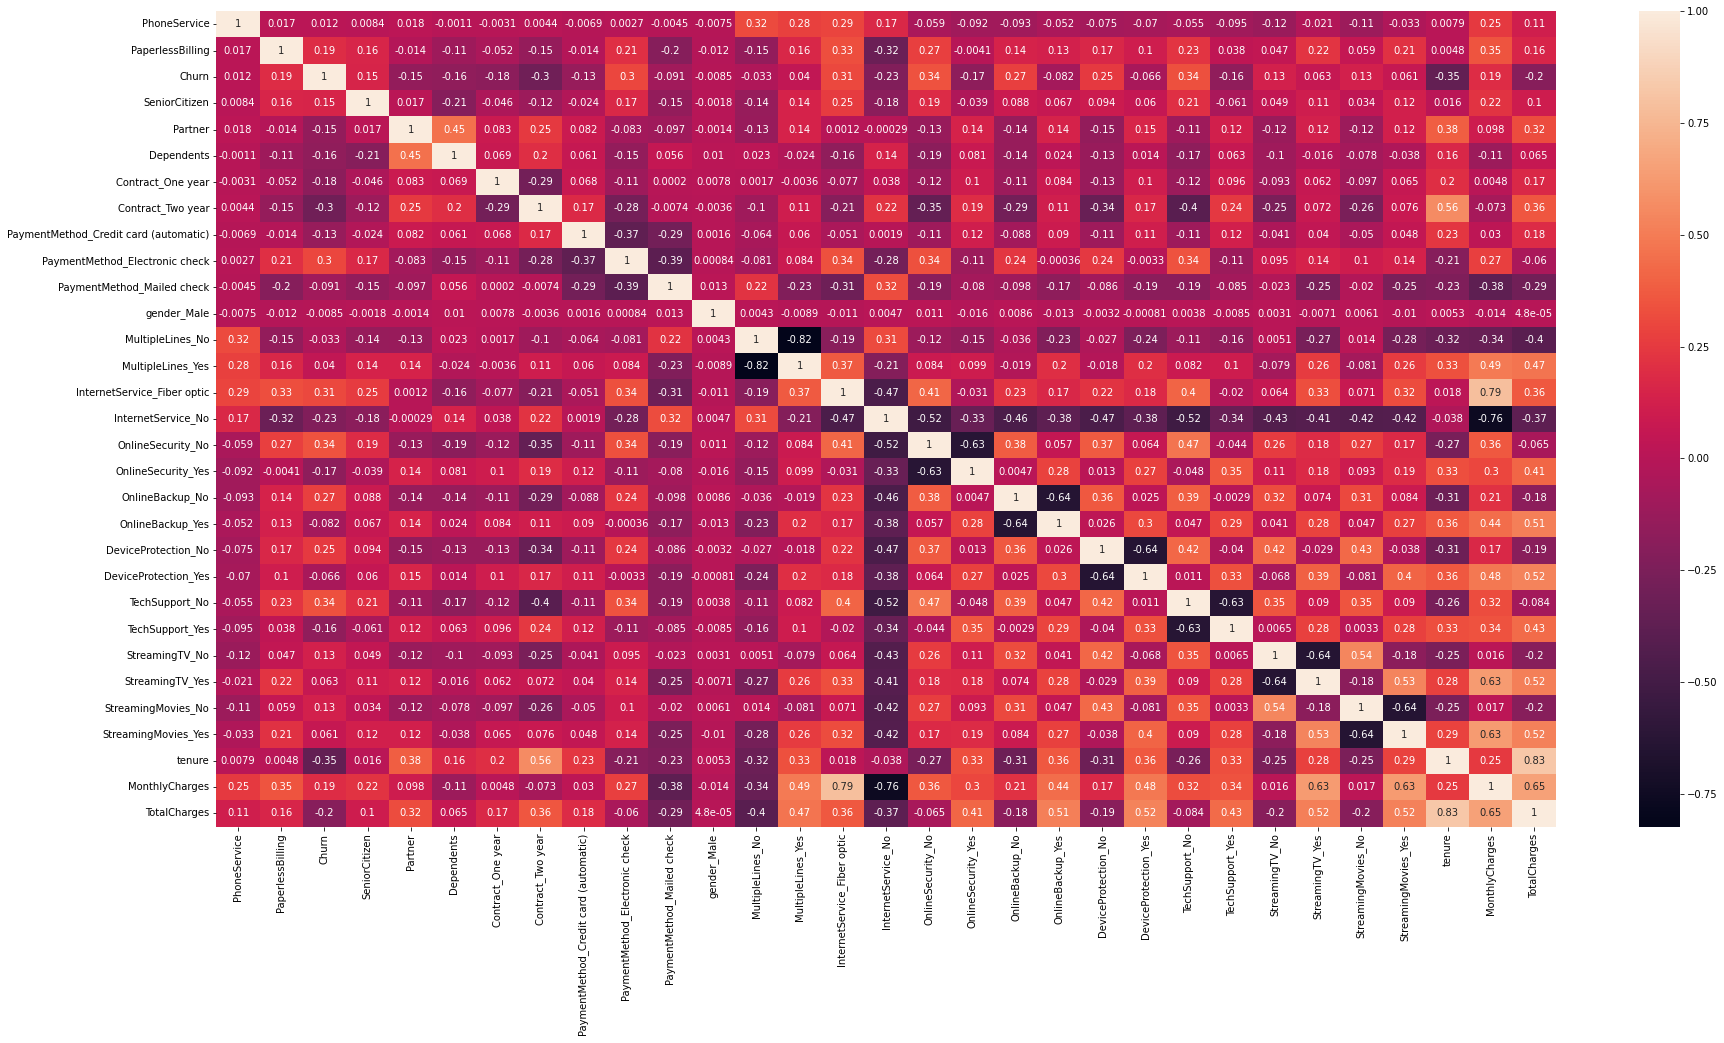

In [284]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,15))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True)

### Dropping highly correlated variables.

In [285]:
X_test2 = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)
X_train2 = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)

### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

<AxesSubplot:>

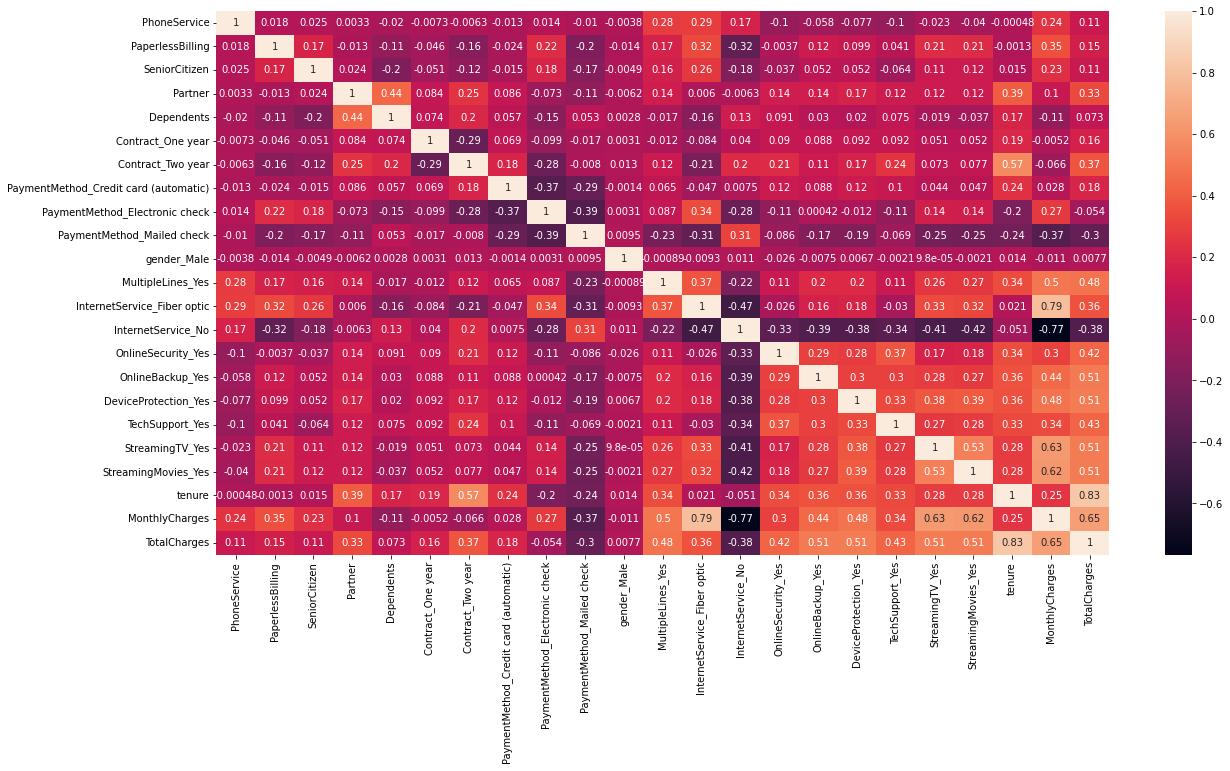

In [286]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train2.corr(),annot = True)

### Re-Running the Model

Now let's run our model again after dropping highly correlated variables

In [287]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train2)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Fri, 21 Oct 2022   Deviance:                       4009.4
Time:                        13:26:15   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9338      1.545     -2.545      0.011      -6.963      -0.905
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
tenure                                   -1.5198      0.190     -8.015      0.000      -1.891      -1.148
MonthlyCharges                           -2.1817      1.160     -1.880      0.060      -4.456       0.092
TotalCharges                              0.7329      0.198      3.705      0.000       0.345       1.121
=========================================================================================================
"""

### Feature Selection Using RFE

In [288]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=13)             # running RFE with 13 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[False  True False False False  True  True False  True False False  True
 False  True  True  True False False False False False False False False
  True False  True  True  True  True]
[ 5  1  3 18  4  1  1 11  1 12 17  1 16  1  1  1  7  6 15  9 10  2  8 14
  1 13  1  1  1  1]


In [289]:
# Variables selected by RFE 
col = ['PhoneService', 'PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check','MultipleLines_No','InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes','TechSupport_Yes','StreamingMovies_No','tenure','TotalCharges']

In [290]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train[col], y_train)

LogisticRegression()

In [291]:
#Comparing the model with StatsModels
logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2024.2
Date:                Fri, 21 Oct 2022   Deviance:                       4048.4
Time:                        13:26:18   Pearson chi2:                 6.19e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2787
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.0162      0.169     -6.017      0.000      -1.347      -0.685
PhoneService                      -0.3090      0.173     -1.784      0.074      -0.648       0.030
PaperlessBilling                   0.3595      0.089      4.029      0.000       0.185       0.534
Contract_One year                 -0.7012      0.127     -5.516      0.000      -0.950      -0.452
Contract_Two year                 -1.3187      0.210     -6.271      0.000      -1.731      -0.907
PaymentMethod_Electronic check     0.3668      0.083      4.446      0.000       0.205       0.529
MultipleLines_No                  -0.2311      0.095     -2.435      0.015      -0.417      -0.045
InternetService_Fiber optic        0.7937      0.116      6.836      0.000       0.566       1.021
InternetService_No                -1.1832      0.182     -6.484      0.000      -1.541      -0.826
OnlineSecurity_Yes                -0.4107      0.102     -4.031      0.000      -0.610      -0.211
TechSupport_Yes                   -0.4181      0.101     -4.135      0.000      -0.616      -0.220
StreamingMovies_No                -0.2024      0.094     -2.160      0.031      -0.386      -0.019
tenure                            -1.4974      0.181     -8.251      0.000      -1.853      -1.142
TotalCharges                       0.7373      0.186      3.965      0.000       0.373       1.102
==================================================================================================
"""

In [292]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [293]:
telecom.columns
['PhoneService', 'PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check','MultipleLines_No','InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes','TechSupport_Yes','StreamingMovies_No','tenure','TotalCharges']

['PhoneService',
 'PaperlessBilling',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Electronic check',
 'MultipleLines_No',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_Yes',
 'TechSupport_Yes',
 'StreamingMovies_No',
 'tenure',
 'TotalCharges']

In [294]:
# Calculating Vif value
vif_cal(input_data=telecom.drop(['customerID','SeniorCitizen', 'Partner', 'Dependents',
                                 'PaymentMethod_Credit card (automatic)','PaymentMethod_Mailed check',
                                 'gender_Male','MultipleLines_Yes','OnlineSecurity_No','OnlineBackup_No',
                                 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
                                 'TechSupport_No','StreamingTV_No','StreamingTV_Yes','StreamingMovies_Yes',
                                 'MonthlyCharges'], axis=1), dependent_col='Churn')

,Var,Vif
0,PhoneService,10.87
12,TotalCharges,8.58
11,tenure,6.80
1,PaperlessBilling,2.61
7,InternetService_No,0.65
3,Contract_Two year,0.28
2,Contract_One year,0.24
9,TechSupport_Yes,0.24
8,OnlineSecurity_Yes,0.21
10,StreamingMovies_No,0.19


### Dropping Variable with high VIF

In [295]:
col = ['PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check','MultipleLines_No','InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes','TechSupport_Yes','StreamingMovies_No','tenure','TotalCharges']

In [296]:
logm5 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4909
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2025.8
Date:                Fri, 21 Oct 2022   Deviance:                       4051.5
Time:                        13:26:19   Pearson chi2:                 6.00e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2782
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.1915      0.138     -8.607      0.000      -1.463      -0.920
PaperlessBilling                   0.3563      0.089      3.998      0.000       0.182       0.531
Contract_One year                 -0.6965      0.127     -5.483      0.000      -0.945      -0.448
Contract_Two year                 -1.3078      0.210     -6.230      0.000      -1.719      -0.896
PaymentMethod_Electronic check     0.3700      0.082      4.487      0.000       0.208       0.532
MultipleLines_No                  -0.2990      0.087     -3.442      0.001      -0.469      -0.129
InternetService_Fiber optic        0.7227      0.108      6.666      0.000       0.510       0.935
InternetService_No                -1.2732      0.175     -7.276      0.000      -1.616      -0.930
OnlineSecurity_Yes                -0.4100      0.102     -4.025      0.000      -0.610      -0.210
TechSupport_Yes                   -0.4202      0.101     -4.157      0.000      -0.618      -0.222
StreamingMovies_No                -0.2205      0.093     -2.366      0.018      -0.403      -0.038
tenure                            -1.4276      0.177     -8.066      0.000      -1.774      -1.081
TotalCharges                       0.6495      0.179      3.622      0.000       0.298       1.001
==================================================================================================
"""

In [297]:
# Calculating Vif value
vif_cal(input_data=telecom.drop(['customerID','PhoneService','SeniorCitizen', 'Partner', 'Dependents',
                                 'PaymentMethod_Credit card (automatic)','PaymentMethod_Mailed check',
                                 'gender_Male','MultipleLines_Yes','OnlineSecurity_No','OnlineBackup_No',
                                 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
                                 'TechSupport_No','StreamingTV_No','StreamingTV_Yes','StreamingMovies_Yes',
                                 'MonthlyCharges'], axis=1), dependent_col='Churn')

,Var,Vif
11,TotalCharges,8.24
10,tenure,6.56
0,PaperlessBilling,2.44
6,InternetService_No,0.45
2,Contract_Two year,0.26
8,TechSupport_Yes,0.24
1,Contract_One year,0.23
7,OnlineSecurity_Yes,0.21
9,StreamingMovies_No,0.17
3,PaymentMethod_Electronic check,0.05


In [298]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train[col], y_train)

LogisticRegression()

In [299]:
## parameter tuning 
X_train[col].columns

Index(['PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'MultipleLines_No',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'TechSupport_Yes', 'StreamingMovies_No', 'tenure',
       'TotalCharges'],
      dtype='object')

### Making Predictions

In [300]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test[col])

In [301]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [302]:
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

In [303]:
# Let's see the head
y_pred_1.head()

,1
0,0.497860
1,0.370391
2,0.006723
3,0.636464
4,0.007508


In [304]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [305]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [306]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [307]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [308]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})

In [309]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Churn','Churn_Prob'], axis=1)

In [310]:
pd.__version__

'1.3.5'

In [311]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,942,0,0.497860
1,3730,1,0.370391
2,1761,0,0.006723
3,2283,1,0.636464
4,1872,0,0.007508


In [312]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
#y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.9 else 0)

In [313]:
# Let's see the head
y_pred_final.head()

,CustID,Churn,Churn_Prob,predicted
0,942,0,0.497860,0
1,3730,1,0.370391,0
2,1761,0,0.006723,0
3,2283,1,0.636464,1
4,1872,0,0.007508,0


### Model Evaluation

In [314]:
from sklearn import metrics

In [315]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.predicted )
confusion

array([[1360,  168],
       [ 249,  333]])

In [316]:
# Predicted     not_churn    churn
# Actual
# not_churn        1326      166
# churn            249       333  

In [317]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.Churn, y_pred_final.predicted)

0.8023696682464455

In [318]:
TN = confusion[0,0] # true positive 
TP = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [319]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5721649484536082

In [320]:
# Let us calculate specificity
TN / float(TN+FP)

0.8900523560209425

In [321]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1099476439790576


In [322]:
# positive predictive value 
print (TP / float(TP+FP))

0.6646706586826348


In [323]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8452454940957116


### ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [324]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

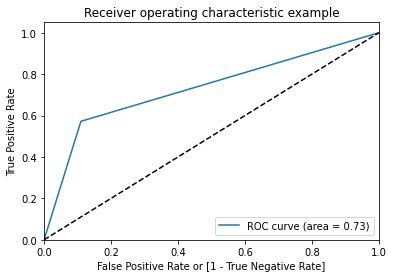

(array([0.        , 0.10994764, 1.        ]),
 array([0.        , 0.57216495, 1.        ]),
 array([2, 1, 0]))

In [325]:
draw_roc(y_pred_final.Churn, y_pred_final.predicted)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [326]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
print(numbers)
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


,CustID,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,942,0,0.497860,0,1,1,1,1,1,0,0,0,0,0
1,3730,1,0.370391,0,1,1,1,1,0,0,0,0,0,0
2,1761,0,0.006723,0,1,0,0,0,0,0,0,0,0,0
3,2283,1,0.636464,1,1,1,1,1,1,1,1,0,0,0
4,1872,0,0.007508,0,1,0,0,0,0,0,0,0,0,0


In [327]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.275829  0.000000  1.000000
0.1   0.1  0.605687  0.477094  0.943299
0.2   0.2  0.695261  0.643979  0.829897
0.3   0.3  0.751659  0.754581  0.743986
0.4   0.4  0.783412  0.827880  0.666667
0.5   0.5  0.802370  0.890052  0.572165
0.6   0.6  0.794787  0.941754  0.408935
0.7   0.7  0.757820  0.979058  0.176976
0.8   0.8  0.727962  1.000000  0.013746
0.9   0.9  0.724171  1.000000  0.000000


<AxesSubplot:xlabel='prob'>

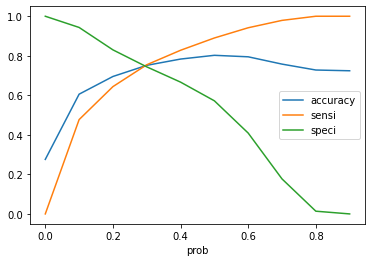

In [328]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [329]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

In [330]:
y_pred_final.head()

,CustID,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,942,0,0.497860,0,1,1,1,1,1,0,0,0,0,0,1
1,3730,1,0.370391,0,1,1,1,1,0,0,0,0,0,0,1
2,1761,0,0.006723,0,1,0,0,0,0,0,0,0,0,0,0
3,2283,1,0.636464,1,1,1,1,1,1,1,1,0,0,0,1
4,1872,0,0.007508,0,1,0,0,0,0,0,0,0,0,0,0


In [331]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.Churn, y_pred_final.final_predicted)

0.7516587677725118

In [332]:
metrics.precision_score( y_pred_final.Churn, y_pred_final.final_predicted)

0.5358910891089109

In [333]:
metrics.f1_score( y_pred_final.Churn, y_pred_final.final_predicted)

0.623021582733813

In [334]:
metrics.recall_score( y_pred_final.Churn, y_pred_final.final_predicted)

0.7439862542955327

In [335]:
metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.final_predicted )

array([[1153,  375],
       [ 149,  433]])

In [336]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#### hyperparameters tuning with gridsearch_cv

In [337]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [338]:
# parameter grid
parameters = {
    'penalty' : ['none', 'l1', 'l2', 'elasticnet'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear','sag', 'saga'],
}

In [339]:
logreg = LogisticRegression()
grid_logreg = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=cv)                     # number of folds

In [340]:
#The GridSearchCV() function returns a LogisticRegression instance,
#which you can then train using your training set:
%time
grid_logreg.fit(X_train[col],y_train)

CPU times: user 9 µs, sys: 3 µs, total: 12 µs
Wall time: 22.4 µs


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [341]:
#you can now print out the tuned-hyperparameters as well as the training accuracy
print("Tuned Hyperparameters :", grid_logreg.best_params_)
print("Accuracy :",grid_logreg.best_score_)


Tuned Hyperparameters : {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.8021129141311698


In [342]:
log_param=LogisticRegression(C=0.1,penalty='l2',solver='liblinear',)
log_param.fit(X_train[col],y_train)
print("Accuracy:",log_param.score(X_test[col], y_test))

Accuracy: 0.8033175355450237


In [343]:
#### with from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
random = RandomizedSearchCV(logreg,parameters,n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)


In [344]:
%%timeit
warnings.filterwarnings('ignore')

#random.fit(X_train[col],y_train)

2.76 µs ± 794 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [345]:
# summarize result
#print('Best Score: %s' % random.best_score_)
#print('Best Hyperparameters: %s' % random.best_params_)

##### hyperopt

In [346]:
!pip install hyperopt

You should consider upgrading via the '/home/bijay/ds_projects/jupylab/bin/python3.7 -m pip install --upgrade pip' command.


In [347]:
from hyperopt import hp, tpe, Trials, STATUS_OK
from hyperopt.fmin import fmin
from hyperopt.pyll.stochastic import sample
import hyperopt

In [348]:
intercepts = [True, False]
solvers1 = ["newton-cg", "lbfgs", ]
solvers2 = ["liblinear", ]
solvers3 = ["saga", ]
penalties1 = ["l2", "none"]
penalties2 = ["l1", "l2"]
penalties3 = ["l1", "elasticnet", "l2"]

case1 = {
        "penalty1": hp.choice("penalty1", penalties1),
        "solver1": hp.choice("solver1", solvers1)
}
case2 = {
        "penalty2": hp.choice("penalty2", penalties2),
        "solver2": hp.choice("solver2", solvers2)
}
case3 = {
        "penalty3": hp.choice("penalty3", penalties3),
        "solver3": hp.choice("solver3", solvers3)
}
#defined search space 1
search_space = {
    "C": hp.uniform("C", 1, 5),
    "fit_intercept": hp.choice("fit_intercept", intercepts),
    "cases" : hp.choice("cases", [("case1", case1), ("case2", case2), ("case3", case3)])
}

In [349]:
# defining the objective function
def objective(args):
    C = args["C"]
    fit_intercept = args["fit_intercept"]
    kwds = args["cases"]
    penalty = kwds[1]["penalty1"] if kwds[0] == "case1" else kwds[1]["penalty2"] if kwds[0] == "case2" else kwds[1]["penalty3"]
    solver = kwds[1]["solver1"] if kwds[0] == "case1" else kwds[1]["solver2"] if kwds[0] == "case2" else kwds[1]["solver3"]

    log_reg = LogisticRegression(C=C,
                                 fit_intercept=fit_intercept,
                                 penalty=penalty,
                                 solver=solver,
                                 l1_ratio=0.5,
                                 random_state=123)

    log_reg.fit(X_train[col], y_train)

    print("Hyperparameters : {}".format(args)) ## This can be commented if not needed.
    print("Accuracy : {}\n".format(log_reg.score(X_test[col], y_test))) ## This can be commented if not needed.

    return -1 * log_reg.score(X_test[col], y_test) ## Multiplied by -1 to maximize accuracy

In [350]:
trials_obj = hyperopt.Trials()
%time
best_results = hyperopt.fmin(objective,
                             space=search_space,
                             algo=hyperopt.tpe.suggest,
                             trials=trials_obj,
                             max_evals=10)

CPU times: user 9 µs, sys: 3 µs, total: 12 µs
Wall time: 30.8 µs
Hyperparameters : {'C': 1.9159937549759043, 'cases': ('case3', {'penalty3': 'elasticnet', 'solver3': 'saga'}), 'fit_intercept': True}
Accuracy : 0.8018957345971564                                                   

Hyperparameters : {'C': 2.9873434177102007, 'cases': ('case3', {'penalty3': 'l1', 'solver3': 'saga'}), 'fit_intercept': True}
Accuracy : 0.8023696682464455                                                   

Hyperparameters : {'C': 1.611396613678712, 'cases': ('case1', {'penalty1': 'l2', 'solver1': 'lbfgs'}), 'fit_intercept': False}
Accuracy : 0.7981042654028436                                                   

Hyperparameters : {'C': 3.3385817237416666, 'cases': ('case1', {'penalty1': 'l2', 'solver1': 'newton-cg'}), 'fit_intercept': False}
Accuracy : 0.7981042654028436                                                   

Hyperparameters : {'C': 1.7081293609493358, 'cases': ('case1', {'penalty1': 'l2', 'solve

In [351]:
#printing best result
print("Best Hyperparameters Settings : {}".format(best_results))
print("\nBest Accuracy : {}".format(-1 * trials_obj.average_best_error()))

Best Hyperparameters Settings : {'C': 2.3986895579827863, 'cases': 1, 'fit_intercept': 0, 'penalty2': 1, 'solver2': 0}

Best Accuracy : 0.8028436018957346


In [352]:
#getting best trails
best_trial = trials_obj.best_trial

best_trial

{'state': 2,
 'tid': 7,
 'spec': None,
 'result': {'loss': -0.8028436018957346, 'status': 'ok'},
 'misc': {'tid': 7,
  'cmd': ('domain_attachment', 'FMinIter_Domain'),
  'workdir': None,
  'idxs': {'C': [7],
   'cases': [7],
   'fit_intercept': [7],
   'penalty1': [],
   'penalty2': [7],
   'penalty3': [],
   'solver1': [],
   'solver2': [7],
   'solver3': []},
  'vals': {'C': [2.3986895579827863],
   'cases': [1],
   'fit_intercept': [0],
   'penalty1': [],
   'penalty2': [1],
   'penalty3': [],
   'solver1': [],
   'solver2': [0],
   'solver3': []}},
 'exp_key': None,
 'owner': None,
 'version': 0,
 'book_time': datetime.datetime(2022, 10, 21, 7, 59, 12, 52000),
 'refresh_time': datetime.datetime(2022, 10, 21, 7, 59, 12, 111000)}

In [353]:
C = best_results["C"]
fit_intercept = intercepts[best_results["fit_intercept"]]
if best_results["cases"] == 0:
    penalty = penalties1[best_results["penalty1"]]
    solver = solvers1[best_results["solver1"]]
elif best_results["cases"] == 1:
    penalty = penalties2[best_results["penalty2"]]
    solver = solvers2[best_results["solver2"]]
elif best_results["cases"] == 2:
    penalty = penalties3[best_results["penalty3"]]
    solver = solvers3[best_results["solver3"]]

print("Best Hyperparameters Settings : {}".format({"C":C,
                                                   "penalty": penalty,
                                                   "fit_intercept": fit_intercept,
                                                   "solver":solver,
                                                  }))

Best Hyperparameters Settings : {'C': 2.3986895579827863, 'penalty': 'l2', 'fit_intercept': True, 'solver': 'liblinear'}


In [354]:
#print("Best MSE : {}".format(trials_obj.average_best_error()))

In [355]:
log_reg = LogisticRegression(C=C,
                             penalty=penalty,
                             fit_intercept=fit_intercept,
                             solver=solver,
                             random_state=123)

log_reg.fit(X_train[col], y_train)

print("Test  Accuracy : {}".format(log_reg.score(X_test[col], y_test)))
print("Train Accuracy : {}".format(log_reg.score(X_train[col], y_train)))

Test  Accuracy : 0.8028436018957346
Train Accuracy : 0.8017066233238521


In [356]:
import gc
gc.collect()
#system.exit(0)

270

In [357]:
system.exit(0)

NameError: name 'system' is not defined

In [ ]:
#!pip install hpsklearn
"""from hpsklearn import HyperoptEstimator
from hpsklearn import any_classifier
from hpsklearn import any_preprocessing
from hyperopt import tpe"""

In [ ]:
#%lsmagic

In [ ]:
#find the best model with parameters
"""model = HyperoptEstimator(classifier=any_classifier('cla'), 
                          preprocessing=any_preprocessing('pre'), 
                          algo=tpe.suggest, 
                          max_evals=50, trial_timeout=30)"""


In [ ]:
# perform the search
model.fit(X_train[col], y_train)


In [ ]:
# summarize performance
acc = model.score(X_test, y_test)
print("Accuracy: %.3f" % acc)
# summarize the best model
print(model.best_model())